In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet



/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('/Users/harshitgupta/Desktop/vs /VS-Data-Den/model_training/regional_master_50000009.csv',index_col='YEARWEEK',parse_dates=True)
# df.index.freq='MS'

In [3]:
df.head()

,TOTAL_SALES
YEARWEEK,
2018-01-01,1721999
2018-01-08,902891
2018-01-15,1046163
2018-01-22,876159
2018-01-29,1161595


In [4]:
# df['YEARWEEK'] = df['YEARWEEK'].astype(str)
# df['YEARWEEK'] = pd.to_datetime(df['YEARWEEK'].astype(str) + '-0', format='%Y%W-%w')

In [5]:
# df.set_index('YEARWEEK' , inplace=True)

In [6]:
df.reset_index(inplace=True)
df.rename(columns={'YEARWEEK': 'ds', 'TOTAL_SALES': 'y'}, inplace=True)

In [7]:
df.head()

,ds,y
0,2018-01-01,1721999
1,2018-01-08,902891
2,2018-01-15,1046163
3,2018-01-22,876159
4,2018-01-29,1161595


In [8]:
model = Prophet()
model.fit(df)


17:39:14 - cmdstanpy - INFO - Chain [1] start processing
17:39:14 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
train = df.iloc[:int(0.8*len(df))]
test = df.iloc[int(0.8*len(df)):]


In [10]:
train.count() , test.count()

(ds    260
 y     260
 dtype: int64,
 ds    65
 y     65
 dtype: int64)

In [26]:
future = model.make_future_dataframe(periods=len(test) , include_history= True)

In [27]:
forecast = model.predict(future)


In [28]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
385,2024-05-18,1.140945e+06,-100132.750755,2.187681e+06,1.140532e+06,1.141440e+06,-127058.098483,-127058.098483,-127058.098483,-127058.098483,-127058.098483,-127058.098483,0.0,0.0,0.0,1.013887e+06
386,2024-05-19,1.140834e+06,-164820.271680,2.227923e+06,1.140405e+06,1.141347e+06,-103053.268119,-103053.268119,-103053.268119,-103053.268119,-103053.268119,-103053.268119,0.0,0.0,0.0,1.037780e+06
387,2024-05-20,1.140722e+06,-19572.844465,2.224727e+06,1.140275e+06,1.141256e+06,-72853.737481,-72853.737481,-72853.737481,-72853.737481,-72853.737481,-72853.737481,0.0,0.0,0.0,1.067869e+06
388,2024-05-21,1.140611e+06,-6810.458592,2.287906e+06,1.140155e+06,1.141171e+06,-36279.845807,-36279.845807,-36279.845807,-36279.845807,-36279.845807,-36279.845807,0.0,0.0,0.0,1.104331e+06
389,2024-05-22,1.140500e+06,-30391.464509,2.319329e+06,1.140026e+06,1.141080e+06,6656.649053,6656.649053,6656.649053,6656.649053,6656.649053,6656.649053,0.0,0.0,0.0,1.147157e+06


/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



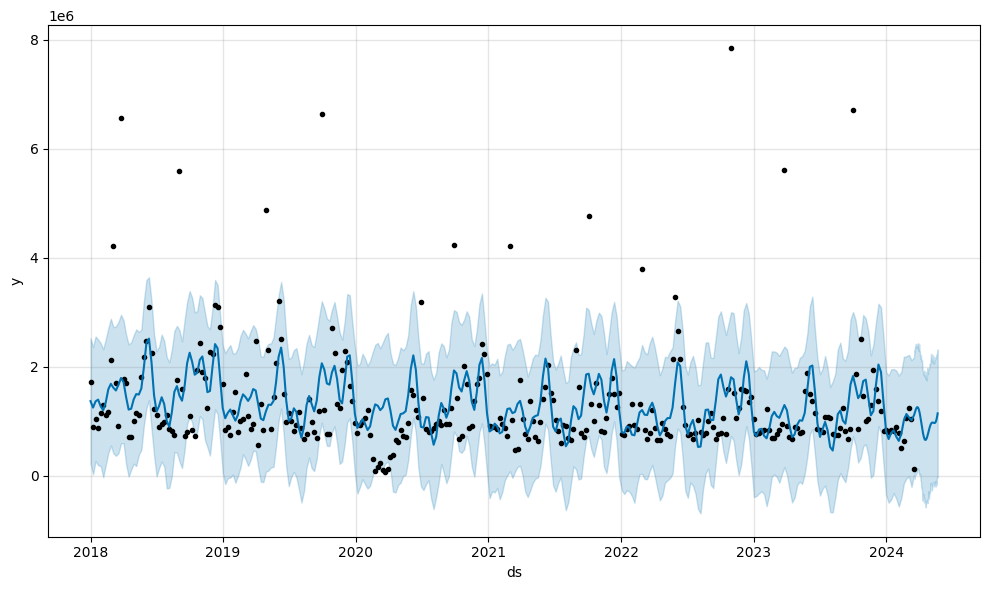

In [29]:
fig = model.plot(forecast)

/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will retur

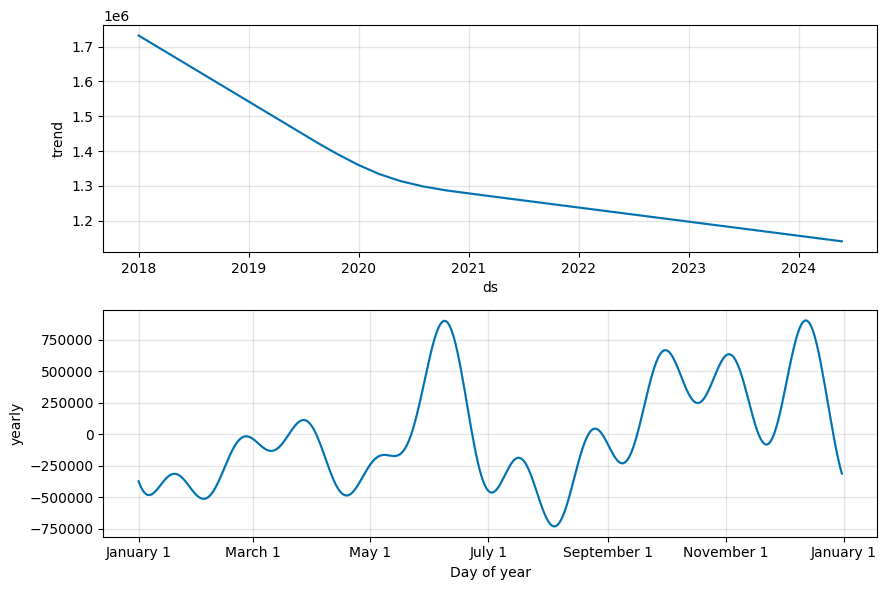

In [15]:
fig2 = model.plot_components(forecast)

In [30]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 8, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0), ...,
                          datetime.datetime(2024, 3, 4, 0, 0),
                          datetime.datetime(2024, 3, 11, 0, 0),
                          datetime.datetime(2024, 3, 18, 0, 0)], dtype=object),
              'y': array([1721999,  902891, 1046163, ..., 1247705, 1042492,  120695])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 8, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0), ...,
                          datetime.datetime(2024, 5, 20, 0, 0),
                          datetime.datetime(2024, 5, 21, 0, 0),
                          datetime.datetime(2024, 5, 22, 0, 0)], dtype=object),
              'y': array([230101.96870818,  28170.37579529, 275511.88980092, ..., -19572.84446497,
                           -6810.45859239, -30391.46450874])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 8, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0), ...,
                          datetime.datetime(2024, 5, 20, 0, 0),
                          datetime.datetime(2024, 5, 21, 0, 0),
                          datetime.datetime(2024, 5, 22, 0, 0)], dtype=object),
              'y': array([1371368.06931555, 1252432.76915387, 1367493.07212711, ...,
                          1067868.72349766, 1104331.36114231, 1147156.60197292])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 8, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0), ...,
                          datetime.datetime(2024, 5, 20, 0, 0),
                          datetime.datetime(2024, 5, 21, 0, 0),
                          datetime.datetime(2024, 5, 22, 0, 0)], dtype=object),
              'y': array([2526623.79522535, 2362375.71427796, 2556132.60715013, ...,
                          2224726.74558523, 2287906.41647097, 2319328.9022528 ])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
       

In [17]:
plot_components_plotly(model, forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'trend',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 8, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0), ...,
                          datetime.datetime(2024, 5, 20, 0, 0),
                          datetime.datetime(2024, 5, 21, 0, 0),
                          datetime.datetime(2024, 5, 22, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([1732128.841296  , 1728487.569935  , 1724846.298574  , ...,
                          1140722.4609782 , 1140611.20694904, 1140499.95291989]),
              'yaxis': 'y'},
             {'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_upper',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 8, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0), ...,
                          datetime.datetime(2024, 5, 20, 0, 0),
                          datetime.datetime(2024, 5, 21, 0, 0),
                          datetime.datetime(2024, 5, 22, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([1732128.841296  , 1728487.569935  , 1724846.298574  , ...,
                          1141369.97021821, 1141275.74565267, 1141181.09468792]),
              'yaxis': 'y'},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_lower',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 8, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0), ...,
                          datetime.datetime(2024, 5, 20, 0, 0),
                          datetime.datetime(2024, 5, 21, 0, 0),
                          datetime.datetime(2024, 5, 22, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([1732128.841296  , 1728487.569935  , 1724846.298574  , ...,
                          1140109.825806  , 1139969.71503531, 1139829.47672442]),
              'yaxis': 'y'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0, 59, 178082),
                          datetime.datetime(2017, 1, 3, 0, 1, 58, 356164), ...,
                          datetime.datetime(2017, 12, 29, 5, 57, 2, 465753),
                          datetime.datetime(2017, 12, 30, 5, 58, 1, 643835),
                          datetime.datetime(2017, 12, 31, 5, 59, 0, 821917)], dtype=object),
              'xaxis': 'x2',
              'y': array([-371838.5673602 , -410691.74405966, -440779.42118202, ...,
                          -204059.3252906 , -268151.1984111 , -324240.11431892]),
              'yaxis': 'y2'}],
    'layout': {'height': 400,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'anchor': 'y',
                         'domain': [0.0, 1.0],
                         'range': [2017-09-06 08:24:00, 2024-09-15 15:36:00],
                         'type': 'date'},
               'xaxis2': {'anchor': 'y2',
                          'domain': [0.0, 1.0],
                          'range': [2016-12-13 18:54:02.958904115, 2018-01-18
                                    11:04:57.863013581],
                          'tickformat': '%B %e',
                          'type': 'date'},
               'yaxis': {'anchor

In [31]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(df['y'], forecast['yhat'][:-len(test)]))
print("RMSE:", rmse)


RMSE: 907302.5521236833


In [32]:
n = len(df)
num_params = 6


rss = np.sum((df['y'] - forecast['yhat'][:-len(test)]) ** 2)

# Calculate AIC
aic = n * np.log(rss / n) + 2 * num_params
print("AIC:", aic)

AIC: 8928.85031122027
